In [15]:
!pip install pygplates
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 60.6 MB/s eta 0:00:00


In [3]:
import pygplates

In [8]:
!git clone https://github.com/Antel0pe/pygplates-tutorials.git

Cloning into 'pygplates-tutorials'...
remote: Enumerating objects: 556, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 556 (delta 70), reused 152 (delta 65), pack-reused 397 (from 1)
Receiving objects: 100% (556/556), 236.90 MiB | 26.07 MiB/s, done.
Resolving deltas: 100% (219/219), done.
Updating files: 100% (175/175), done.


In [9]:
!mv /content/pygplates-tutorials/data /content/data
!ls /content

data  pygplates  pygplates-tutorials  sample_data


In [11]:
# Names of input rotation file
input_rotation_filename = 'data/Seton_etal_ESR2012_2012.1.rot'

# Input parameters to define how the reconstruction is made
reconstruction_time = 40.
anchor_plate = 0

# Define a list of (lat,long,plateid) for each point we want to reconstruct
points = []
points.append((-30.,110.,801))
points.append((-30.,120.,801))

point_features = []
for lat, lon, plate_id in points:
    point_feature = pygplates.Feature()
    point_feature.set_geometry(pygplates.PointOnSphere(lat, lon))
    point_feature.set_reconstruction_plate_id(plate_id)
    point_features.append(point_feature)

# Reconstruct the point features.
reconstructed_feature_geometries = []
pygplates.reconstruct(point_features, input_rotation_filename,
                      reconstructed_feature_geometries, reconstruction_time)

# Each reconstructed geometry should be a point - return a list of all reconstructed points.
for reconstructed_feature_geometry in reconstructed_feature_geometries:
    print('Coordinates of the reconstructed point:', \
        reconstructed_feature_geometry.get_reconstructed_geometry().to_lat_lon() )

Coordinates of the reconstructed point: (-49.785122680161045, 92.59187664759266)
Coordinates of the reconstructed point: (-50.81320047770949, 106.06856804492699)


In [13]:
# Names of input files
input_feature_filename = 'data/Seton_etal_ESR2012_Coastlines_2012.1_Polygon.gpmlz'
input_rotation_filename = 'data/Seton_etal_ESR2012_2012.1.rot'

# Input parameters to define how the reconstruction is made
reconstruction_time = 120.6
anchor_plate = 0

# Name of ouput file
output_reconstructed_feature_filename = '/tmp/tmp.shp'

# Use pygplates to carry out the reconstruction
pygplates.reconstruct(input_feature_filename, input_rotation_filename, output_reconstructed_feature_filename,
                      reconstruction_time, anchor_plate)

In [22]:
# Skip header comments and look at actual data
with open(input_rotation_filename, 'r') as f:
    for i, line in enumerate(f):
        if i > 200 and i < 210:
            print(line)
        elif i > 210:  # Show first few actual data lines
            break

# Look at the coastline file
with open(input_feature_filename, 'rb') as f:  # Note: 'rb' because it's a .gpmlz file
    print("\nFirst few bytes of coastline file:")
    print(f.read(100))  # First 100 bytes

139  0.0   0.0    0.0    0.0  126 !  ALT3-WAT Alexander Terrane 3-Wrangellia and Alexander Terrane

139 140.0   0.0    0.0    0.0  126 !  ALT3-WAT

139 280.0 -60.12   35.77   48.08  126 !  ALT3-WAT Seton et. al. This Study

139 340.0 -62.45   31.63   31.23  126 !  ALT3-WAT Seton et. al. This Study

139 450.0 -62.45   31.63   31.23  126 !  ALT3-WAT Seton et. al. This Study

140  0.0   0.0    0.0    0.0  126 !  PEN1-WAT Peninsula Terrane 1-Wrangellia and Alexander Terrane

140 450.0   0.0    0.0    0.0  126 !  PEN1-WAT

155  0.0   0.0    0.0    0.0  103 !  FARW-NSA Farewell Terrane-North Slope Alaska

155 600.0   0.0    0.0    0.0  103 !  FARW-NSA


First few bytes of coastline file:
b'\x1f\x8b\x08\x08\xc3c\xd3T\x02\x00228c7a88-30b0-40b3-9d3a-f65a9f7ddb79.gpml\x00\xecZ[o\x9b0\x14~\x9f\xb4\xff\x10\xe5\x9d\xe0;v\x95e\x8a\xda\xb4\xab\xd6\xacQ\x92\xdd\x9e*.&\xb3\x96@\x04dm\xf7\xebgp2\x85\x89\x8d\xad\xbb'


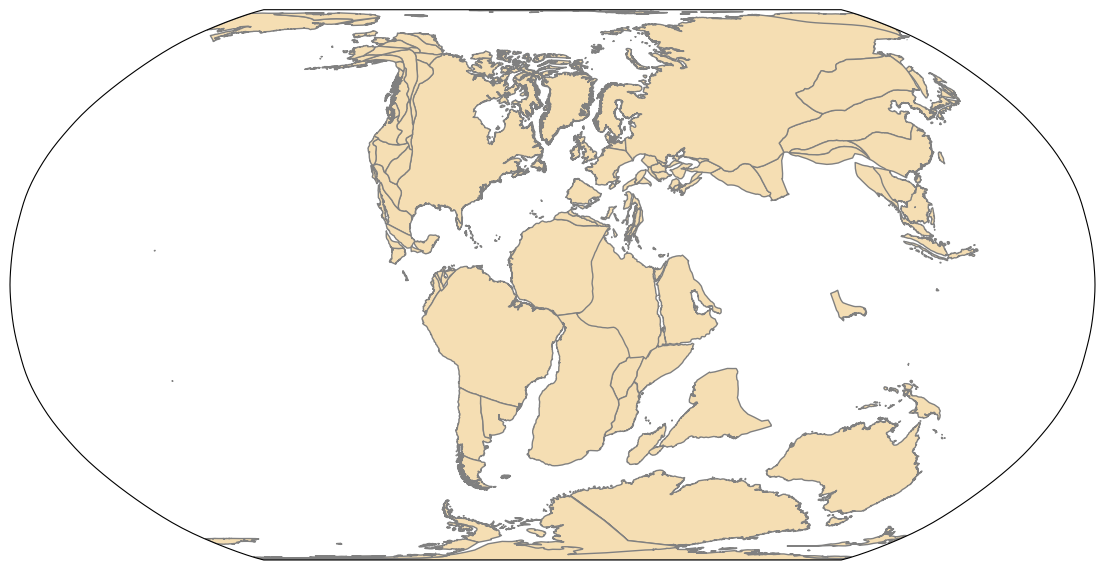

In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
import numpy as np
%matplotlib inline

fig = plt.figure(figsize=(14,10))
ax_map = fig.add_subplot(111, projection=ccrs.Robinson())

shp_coast = shpreader.Reader(output_reconstructed_feature_filename)
ft_coast = cfeature.ShapelyFeature(shp_coast.geometries(), crs=ccrs.PlateCarree())

ax_map.add_feature(ft_coast, facecolor='Wheat', edgecolor='Grey')

In [29]:
import pygplates
import sys,os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from shapely.geometry import MultiLineString

# import plate_tectonic_utils, velocity_utils

data_root = 'data/workshop/'
coastlines_filename = data_root+'Coastlines/Global_coastlines_2015_v1_low_res.shp'
continental_polygons_filename = data_root+'ContinentalPolygons/Seton_etal_ESR2012_ContinentalPolygons_2012.1.gpmlz'
topology_filenames = []
topology_filenames.append(data_root+'Global_EarthByte_Mesozoic-Cenozoic_plate_boundaries_Matthews_etal.gpml')
topology_filenames.append(data_root+'Global_EarthByte_Paleozoic_plate_boundaries_Matthews_etal.gpml')
fracture_zones_filename = data_root + 'Fracture_zones/Fracture_zones_workshop.shp'
magnetic_picks_filenames = []
magnetic_picks_filenames.append(data_root+'GSFML.IndianOcean/GSFML.IndianOcean.picks_ws.shp')
magnetic_picks_filenames.append(data_root+'GSFML.AtlanticOcean/GSFML.AtlanticOcean.picks_ws.shp')
magnetic_picks_filenames.append(data_root+'GSFML.MarginalBackarcBasins/GSFML.Marginal_BackarcBasins.picks_ws.shp')
magnetic_picks_filenames.append(data_root+'GSFML.PacificOcean/GSFML.PacificOcean.picks_ws.shp')
cob_filename = data_root + 'ContinentOceanBoundaries/Shapefile/Seton_etal_ESR2012_ContinentOceanBoundaries_2012.1_ws.shp'
mineral_filename = data_root + 'mrds/test.shp'
mineral_AU_filename = data_root + 'mrds/AU_deposits.shp'

rotation_filenames = []
rotation_filenames.append(data_root+'Global_EB_250-0Ma_GK07_Matthews_etal.rot')
rotation_filenames.append(data_root+'Global_EB_410-250Ma_GK07_Matthews_etal.rot')

# Base name of ouput file.
coastlines_output_basename = 'tmp/coastlines'
continental_polygons_output_basename = 'tmp/continental'
topology_output_basename = 'tmp/topology'
fracture_zones_output_basename = 'tmp/fracture'
magnetic_picks_output_basename = 'tmp/magnetic'
cob_output_basename = 'tmp/cob'
mineral_output_basename = 'tmp/mineral'
mineral_AU_output_basename = 'tmp/mineral_au'

def make_GPML_velocity_feature(Long,Lat):
# function to make a velocity mesh nodes at an arbitrary set of points defined in Lat
# Long and Lat are assumed to be 1d arrays.

    # Add points to a multipoint geometry
    multi_point = pygplates.MultiPointOnSphere([(float(lat),float(lon)) for lat, lon in zip(Lat,Long)])

    # Create a feature containing the multipoint feature, and defined as MeshNode type
    meshnode_feature = pygplates.Feature(pygplates.FeatureType.create_from_qualified_string('gpml:MeshNode'))
    meshnode_feature.set_geometry(multi_point)
    meshnode_feature.set_name('Velocity Mesh Nodes from pygplates')

    output_feature_collection = pygplates.FeatureCollection(meshnode_feature)

    # NB: at this point, the feature could be written to a file using
    # output_feature_collection.write('myfilename.gpmlz')

    # for use within the notebook, the velocity domain feature is returned from the function
    return output_feature_collection


def Get_Plate_Velocities(velocity_domain_features, topology_features, rotation_model, time, delta_time, rep='vector_comp'):
    # All domain points and associated (magnitude, azimuth, inclination) velocities for the current time.
    all_domain_points = []
    all_velocities = []

    # Partition our velocity domain features into our topological plate polygons at the current 'time'.
    plate_partitioner = pygplates.PlatePartitioner(topology_features, rotation_model, time)

    for velocity_domain_feature in velocity_domain_features:

        # A velocity domain feature usually has a single geometry but we'll assume it can be any number.
        # Iterate over them all.
        for velocity_domain_geometry in velocity_domain_feature.get_geometries():

            for velocity_domain_point in velocity_domain_geometry.get_points():

                all_domain_points.append(velocity_domain_point)

                partitioning_plate = plate_partitioner.partition_point(velocity_domain_point)
                if partitioning_plate:

                    # We need the newly assigned plate ID to get the equivalent stage rotation of that tectonic plate.
                    partitioning_plate_id = partitioning_plate.get_feature().get_reconstruction_plate_id()

                    # Get the stage rotation of partitioning plate from 'time + delta_time' to 'time'.
                    equivalent_stage_rotation = rotation_model.get_rotation(time, partitioning_plate_id, time + delta_time)

                    # Calculate velocity at the velocity domain point.
                    # This is from 'time + delta_time' to 'time' on the partitioning plate.
                    velocity_vectors = pygplates.calculate_velocities(
                        [velocity_domain_point],
                        equivalent_stage_rotation,
                        delta_time)

                    if rep=='mag_azim':
                        # Convert global 3D velocity vectors to local (magnitude, azimuth, inclination) tuples (one tuple per point).
                        velocities = pygplates.LocalCartesian.convert_from_geocentric_to_magnitude_azimuth_inclination(
                            [velocity_domain_point],
                            velocity_vectors)
                        all_velocities.append(velocities[0])

                    elif rep=='vector_comp':
                        # Convert global 3D velocity vectors to local (magnitude, azimuth, inclination) tuples (one tuple per point).
                        velocities = pygplates.LocalCartesian.convert_from_geocentric_to_north_east_down(
                                [velocity_domain_point],
                                velocity_vectors)
                        all_velocities.append(velocities[0])

                else:
                    all_velocities.append((0,0,0))

    return all_velocities

def get_colour_by_plateid(plate_id):
    from matplotlib import colors
    converter = colors.ColorConverter()
    plateid_colours = {
        0: list(converter.to_rgba('yellow',alpha=1.0)),
        1: list(converter.to_rgba('aqua',alpha=1.0)),
        2: list(converter.to_rgba('seagreen',alpha=1.0)),
        3: list(converter.to_rgba('fuchsia',alpha=1.0)),
        4: list(converter.to_rgba('slategray',alpha=1.0)),
        5: list(converter.to_rgba('lime',alpha=1.0)),
        6: list(converter.to_rgba('indigo',alpha=1.0)),
        7: list(converter.to_rgba('red',alpha=1.0)),
        8: list(converter.to_rgba('orange',alpha=1.0)),
        9: list(converter.to_rgba('lightsalmon',alpha=1.0)),
        10: list(converter.to_rgba('navy',alpha=1.0)),
    }
    return plateid_colours[plate_id%11]

class Tutorial(object):
    def __init__(self):
        self.reconstruction_time = 0.
        self.anchor_plate = 0
        self.delta_time = 5.
        Path("./tmp").mkdir(parents=True, exist_ok=True)
        if not os.path.isdir('data'):
            raise Exception('The Data folder is not found! Try `ln -s ../data Data` in the "notebooks" folder.')


    def reconstruct_coastlines(self):
        #
        #-----------Use pygplates to carry out the reconstruction
        #
        print('Reconstructing coastlines...')
        pygplates.reconstruct(
                coastlines_filename,
                rotation_filenames,
                coastlines_output_basename+'.shp',
                self.reconstruction_time,
                self.anchor_plate)

    def reconstruct_continental_polygons(self):
        #
        #-----------Use pygplates to carry out the reconstruction
        #
        print('Reconstructing continental polygons...')
        pygplates.reconstruct(
                continental_polygons_filename,
                rotation_filenames,
                continental_polygons_output_basename+'.shp',
                self.reconstruction_time,
                self.anchor_plate)

    def reconstruct_mineral_deposits(self):
        pygplates.reconstruct(
                mineral_filename,
                rotation_filenames,
                mineral_output_basename+'.shp',
                self.reconstruction_time,
                self.anchor_plate)

        pygplates.reconstruct(
                mineral_AU_filename,
                rotation_filenames,
                mineral_AU_output_basename+'.shp',
                self.reconstruction_time,
                self.anchor_plate)

    def reconstruct_topologies(self):
        print('Resolving topologies')
        rotation_model = pygplates.RotationModel(rotation_filenames)
        pygplates.resolve_topologies(
                topology_filenames,
                rotation_model,
                topology_output_basename+'.shp',
                self.reconstruction_time)


    def reconstruct_fracture_zones(self):
        # Use pygplates to carry out the reconstruction
        print('Reconstructing fracture zones...')
        pygplates.reconstruct(
                fracture_zones_filename,
                rotation_filenames,
                fracture_zones_output_basename+'.shp',
                self.reconstruction_time,
                self.anchor_plate)


    def reconstruct_continent_ocean_boundaries(self):
        # Use pygplates to carry out the reconstruction
        pygplates.reconstruct(
                cob_filename,
                rotation_filenames,
                cob_output_basename+'.shp',
                self.reconstruction_time,
                self.anchor_plate)


    def reconstruct_magnetic_picks(self):
        sys.stdout.flush()
        cnt=0
        for filename in magnetic_picks_filenames:
            cnt+=1
            # Use pygplates to carry out the reconstruction
            print('Reconstructing magnetic picks in {}'.format(filename) )
            sys.stdout.flush()
            pygplates.reconstruct(
                    filename,
                    rotation_filenames,
                    magnetic_picks_output_basename+'_{}.shp'.format(cnt),
                    self.reconstruction_time,
                    self.anchor_plate)


    def plot_continental_polygons(self, ax, facecolor=None, edgecolor='none', alpha=0.1):
        print('Plotting continental polygons...')
        shape_feature = ShapelyFeature(Reader(continental_polygons_output_basename).geometries(),
                                ccrs.PlateCarree(), edgecolor=edgecolor)
        ax.add_feature(shape_feature,facecolor=facecolor, alpha=alpha)



    def plot_coastlines(self, ax, facecolor='default', edgecolor='k', alpha=0.4):
        print('Plotting coastlines...')

        for record in Reader(coastlines_output_basename+'.shp').records():
            #print(record.attributes)
            fc = facecolor
            if facecolor == 'default':
                fc = get_colour_by_plateid(int(record.attributes['PLATEID1']))

            shape_feature = ShapelyFeature([record.geometry], ccrs.PlateCarree(), edgecolor=edgecolor)
            ax.add_feature(shape_feature,facecolor=fc, alpha=alpha)


    def plot_topologies(self, ax, facecolor='default', edgecolor='w', alpha=0.2):
        print('Plotting topologies...')

        for record in Reader(topology_output_basename+'.shp').records():
            #print(record.attributes)
            fc = facecolor
            if facecolor == 'default':
                fc = get_colour_by_plateid(int(record.attributes['PLATEID1']))

            shape_feature = ShapelyFeature([record.geometry], ccrs.PlateCarree(), edgecolor=edgecolor)
            ax.add_feature(shape_feature,facecolor=fc, alpha=alpha)


    def plot_fracture_zones(self, ax, color='default'):
        #plot the fracture zones
        print('Plotting fracture zones...')

        for record in Reader(fracture_zones_output_basename+'.shp').records():
            #print(record.geometry)
            c=color
            if color == 'default':
                c = get_colour_by_plateid(int(record.attributes['PLATEID1']))

            if type(record.geometry) is MultiLineString:
                for line in record.geometry:
                    lon, lat = line.xy
                    ax.plot(lon,lat,transform=ccrs.Geodetic(),color=c)
            else:
                lon, lat = record.geometry.xy
                ax.plot(lon,lat,transform=ccrs.Geodetic(),color=c)



    def plot_continent_ocean_boundaries(self, ax, color='default'):
        #plot the continent_ocean_boundaries

        for record in Reader(cob_output_basename+'.shp').records():
            #print(record.geometry)
            c = color
            if color == 'default':
                c = get_colour_by_plateid(int(record.attributes['PLATEID1']))

            if type(record.geometry) is MultiLineString:
                for line in record.geometry:
                    lon, lat = line.xy
                    ax.plot(lon,lat,transform=ccrs.Geodetic(),color=c)
            else:
                lon, lat = record.geometry.xy
                ax.plot(lon,lat,transform=ccrs.Geodetic(),color=c)




    def plot_magnetic_picks(self, ax, facecolors='none'):
        for i in range(1,5):
            reader = Reader(f'{magnetic_picks_output_basename}_{i}'+'.shp')
            #m.readshapefile(magnetic_picks_output_basename+'_{}'.format(i) ,'magnetic_{}'.format(i),drawbounds=False,color='w')
            import hashlib
            colors=[]
            lons=[]
            lats=[]
            for s in reader.records():
                if all(k in s.attributes for k in ['Chron', 'AnomalyEnd']):
                    #not really colouring by plate id. In fact, it is colouring by Chron+AnomalyEnd
                    colors.append(
                        get_colour_by_plateid(
                            int(hashlib.sha1(
                                (s.attributes['Chron']+s.attributes['AnomalyEnd']).encode('utf-8')).hexdigest(), 16)))
                else:
                    colors.append(
                        get_colour_by_plateid(0))
                lons.append(s.geometry.x)
                lats.append(s.geometry.y)

            ax.scatter(
                lons,
                lats,
                facecolors='none',
                edgecolor=colors,
                transform=ccrs.PlateCarree(),
                #s=.1,
                zorder=99)



    def plot_mineral_deposits(self, ax, facecolors='none'):
        reader = Reader(mineral_output_basename+'.shp')

        ax.scatter(
                [point.x for point in reader.geometries()],
                [point.y for point in reader.geometries()],
                facecolors=facecolors,
                transform=ccrs.PlateCarree(),
                edgecolors='black',
                s=30,
                zorder=99)

        reader_au = Reader(mineral_AU_output_basename)

        ax.scatter(
                [point.x for point in reader_au.geometries()],
                [point.y for point in reader_au.geometries()],
                facecolors=facecolors,
                edgecolors='gold',
                transform=ccrs.PlateCarree(),
                s=30,
                zorder=99)


    def plot_velocities(self, ax):
        delta_time = 5.
        Xnodes = np.arange(-180,180,5)
        Ynodes = np.arange(-90,90,5)
        Xg,Yg = np.meshgrid(Xnodes,Ynodes)
        Xg = Xg.flatten()
        Yg = Yg.flatten()
        velocity_domain_features = make_GPML_velocity_feature(Xg,Yg)
        # Load one or more rotation files into a rotation model.
        rotation_model = pygplates.RotationModel(rotation_filenames)

        # Load the topological plate polygon features.
        topology_features = []
        for fname in topology_filenames:
            for f in pygplates.FeatureCollection(fname):
                topology_features.append(f)


        # Call the function we created above to get the velocities
        all_velocities = Get_Plate_Velocities(velocity_domain_features,
                                              topology_features,
                                              rotation_model,
                                              self.reconstruction_time,
                                              delta_time,
                                              'vector_comp')

        uu=[]
        vv=[]
        for vel in all_velocities:
            if not hasattr(vel, 'get_y'):
                uu.append(vel[1])
                vv.append(vel[0])
            else:
                uu.append(vel.get_y())
                vv.append(vel.get_x())
        u = np.asarray([uu]).reshape((Ynodes.shape[0],Xnodes.shape[0]))
        v = np.asarray([vv]).reshape((Ynodes.shape[0],Xnodes.shape[0]))

        Q = ax.quiver(Xnodes,Ynodes,u,v,scale=1000,color='grey',transform = ccrs.PlateCarree(), regrid_shape=20)
        # make quiver key.
        qk = plt.quiverkey(Q, 0.95, 1.05, 50, '50 mm/yr', labelpos='W')



    def create_map(self, name, lon=0):
        if name == 'mollweide':
            ax = plt.axes(projection=ccrs.Mollweide(central_longitude=lon))
        elif name == 'robinson':
            ax = plt.axes(projection=ccrs.Robinson(central_longitude=lon))
        else: #'rectangular' and by default
            ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=lon))
        ax.gridlines()
        ax.set_global()
        return ax


    def plot_layers(self, layers, ax):
        for layer in layers:
            if layer == 'coastlines':
                self.reconstruct_coastlines()
                self.plot_coastlines(ax)
            elif layer == 'continental_polygons':
                self.reconstruct_continental_polygons()
                self.plot_continental_polygons(ax)
            elif layer == 'topologies':
                self.reconstruct_topologies()
                self.plot_topologies(ax)
            elif layer == 'fracture':
                self.reconstruct_fracture_zones()
                self.plot_fracture_zones(ax)
            elif layer == 'magnetic':
                self.reconstruct_magnetic_picks()
                self.plot_magnetic_picks(ax)
            elif layer == 'cob':
                self.reconstruct_continent_ocean_boundaries()
                self.plot_continent_ocean_boundaries(ax)
            elif layer == 'mineral':
                self.reconstruct_mineral_deposits()
                self.plot_mineral_deposits(ax)
            elif layer == 'velocities':
                self.plot_velocities(ax)


    def plot_earthquakes(self, ax, minmag=0.0, maxmag=100.0):
        earthquakes = pygplates.FeatureCollection('data/workshop/Earthquakes/earthquakes_new1.shp')

        cm = plt.cm.get_cmap('gnuplot')

        colors = []
        pt_lon = []
        pt_lat = []
        sizes = []
        magnitudes = []
        for q in earthquakes:
            mag = float(q.get_name())

            if mag < minmag:
                continue

            if mag > maxmag:
                continue

            pt = q.get_geometry()
            pt_lon.append(pt.to_lat_lon()[1])
            pt_lat.append(pt.to_lat_lon()[0])

            colors.append(mag)
            sizes.append(35)
            magnitudes.append(mag)

        #x, y = m(pt_lon,pt_lat)

        sc = ax.scatter(
            pt_lon,
            pt_lat,
            c=colors,
            s=sizes,
            transform=ccrs.PlateCarree(),
            vmin=min(magnitudes),
            vmax=max(magnitudes),
            cmap=cm,
            linewidths=0,
            zorder=2
        )

        cbar = plt.colorbar(sc)
        cbar.ax.set_ylabel('Richter magnitude')

# Setup code. Don't worry too much about this.
%matplotlib inline
import matplotlib.pyplot as plt
import pygplates
import sys
# sys.path.append('../libs/')
# from tut import Tutorial
tutorial = Tutorial()

Reconstructing coastlines...
Plotting coastlines...


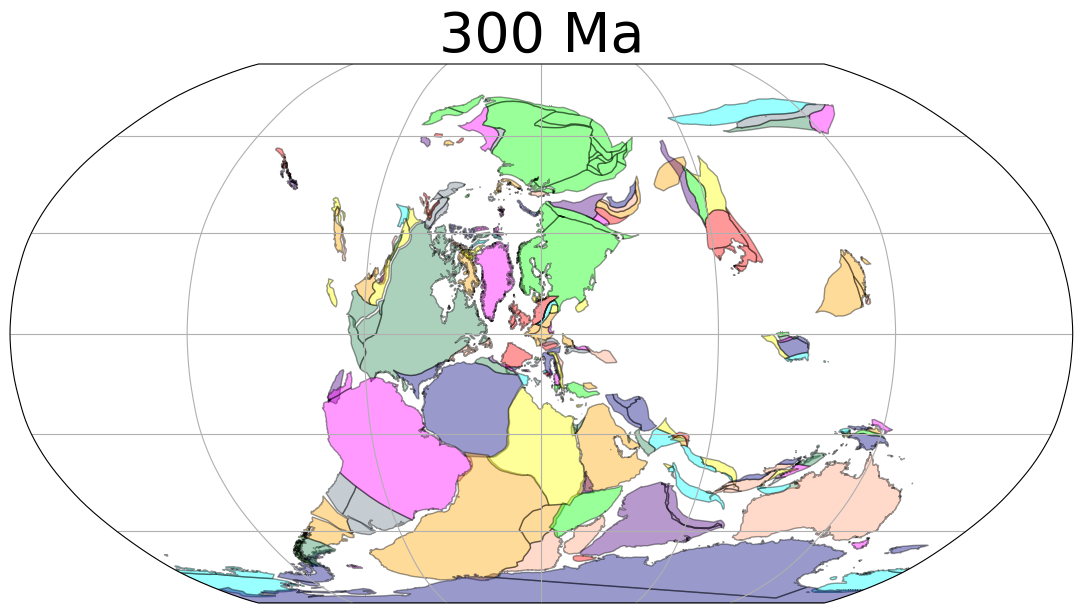

In [30]:
# Set the reconstruction time
# This is the number of million years in the past, so 300 means to
# predict 300 million years into the past (or 300Ma).
# You can go as far back as 400Ma
tutorial.reconstruction_time = 300

# Set up the figure
fig = plt.figure(figsize=(14,7))
#fig.add_axes([0,0,0.9,1.0])

# Projections are rectangular, mollweide or robinson
ax = tutorial.create_map('robinson')
#ax = tutorial.create_map('mollweide')
#ax = tutorial.create_map('rectangular')

# Remember, you can hide a layer by putting # in front of it
layers = [
    'coastlines',
    #'continental_polygons',
    #'topologies',
    #'fracture',
    #'magnetic',
    #'cob',
    #'mineral',
    #'velocities'
]

tutorial.plot_layers(layers, ax)
plt.title('%d Ma' % tutorial.reconstruction_time, fontsize=40)
plt.show()

Reconstructing coastlines...
Plotting coastlines...
Resolving topologies
Plotting topologies...


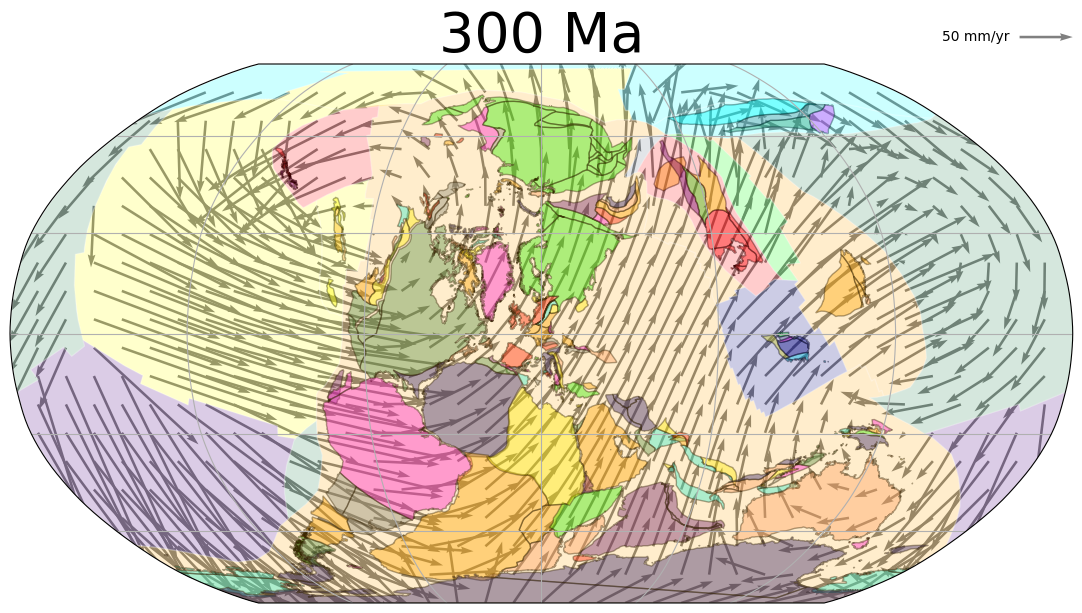

In [31]:
# Set the reconstruction time
# This is the number of million years in the past, so 300 means to
# predict 300 million years into the past (or 300Ma).
# You can go as far back as 400Ma
tutorial.reconstruction_time = 300

# Set up the figure
fig = plt.figure(figsize=(14,7))
#fig.add_axes([0,0,0.9,1.0])

# Projections are rectangular, mollweide or robinson
ax = tutorial.create_map('robinson')

# Remember, you can hide a layer by putting # in front of it
layers = [
    'coastlines',
    #'continental_polygons',
    'topologies',
    #'fracture',
    #'magnetic',
    #'cob',
    'velocities'
]

tutorial.plot_layers(layers, ax)
plt.title('%d Ma' % tutorial.reconstruction_time, fontsize=40)
plt.show()

Reconstructing coastlines...
Plotting coastlines...
Resolving topologies
Plotting topologies...


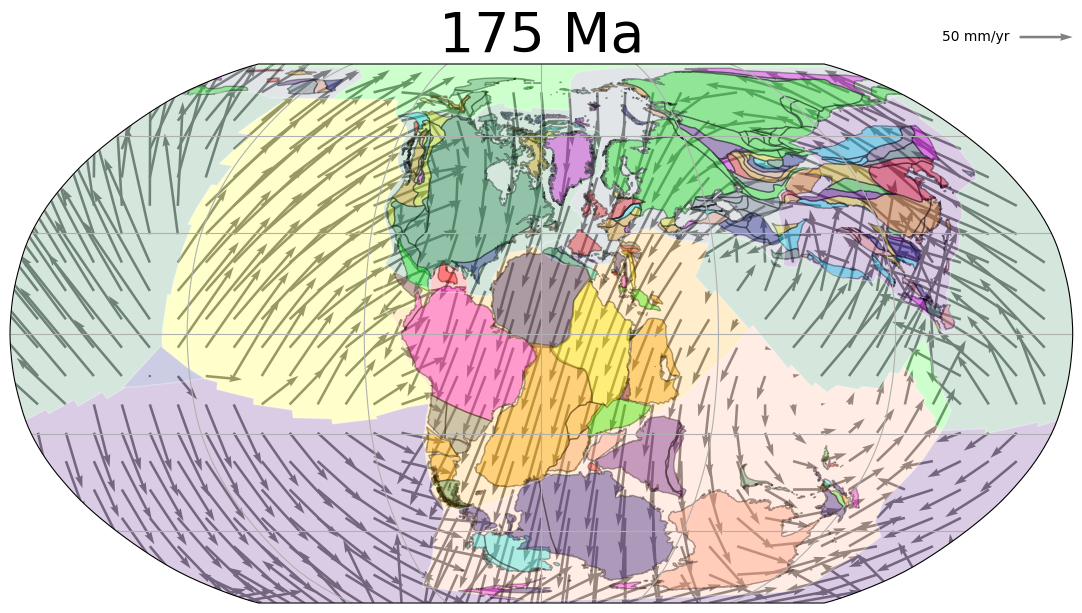

In [32]:
# Set the reconstruction time
tutorial.reconstruction_time = 175

# Set up the figure
fig = plt.figure(figsize=(14,7))
#fig.add_axes([0,0,0.9,1.0])

# Projections are rectangular, mollweide or robinson
ax = tutorial.create_map('robinson')

# Remember, you can hide a layer by putting # in front of it
layers = [
    'coastlines',
    #'continental_polygons',
    'topologies',
    #'fracture',
    #'magnetic',
    #'cob',
    #'mineral',
    'velocities'
]

tutorial.plot_layers(layers, ax)
plt.title('%d Ma' % tutorial.reconstruction_time, fontsize=40)
plt.show()

In [33]:
def reconstructTime(time):
    tutorial.reconstruction_time = time

    # Set up the figure
    fig = plt.figure(figsize=(14,7))
    #fig.add_axes([0,0,0.9,1.0])

    # Projections are rectangular, mollweide or robinson
    ax = tutorial.create_map('robinson')
    #ax = tutorial.create_map('mollweide')
    #ax = tutorial.create_map('rectangular')

    # Remember, you can hide a layer by putting # in front of it
    layers = [
        'coastlines',
        #'continental_polygons',
        #'topologies',
        #'fracture',
        #'magnetic',
        #'cob',
        #'mineral',
        #'velocities'
    ]

    tutorial.plot_layers(layers, ax)
    plt.title('%d Ma' % tutorial.reconstruction_time, fontsize=40)
    plt.show()

Reconstructing coastlines...
Plotting coastlines...


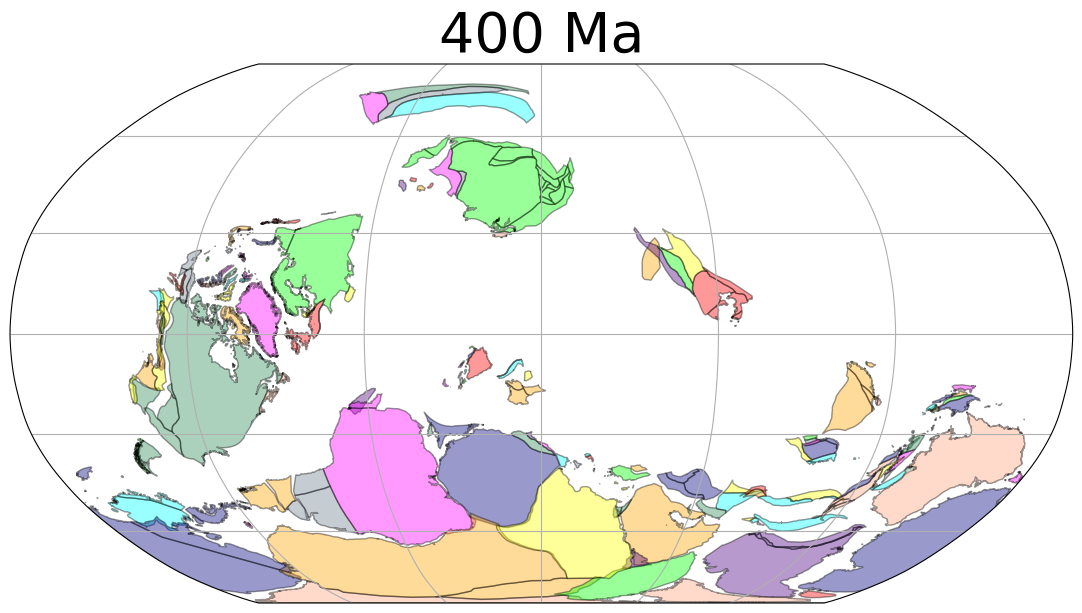

In [35]:
reconstructTime(400)

Reconstructing coastlines...
Plotting coastlines...


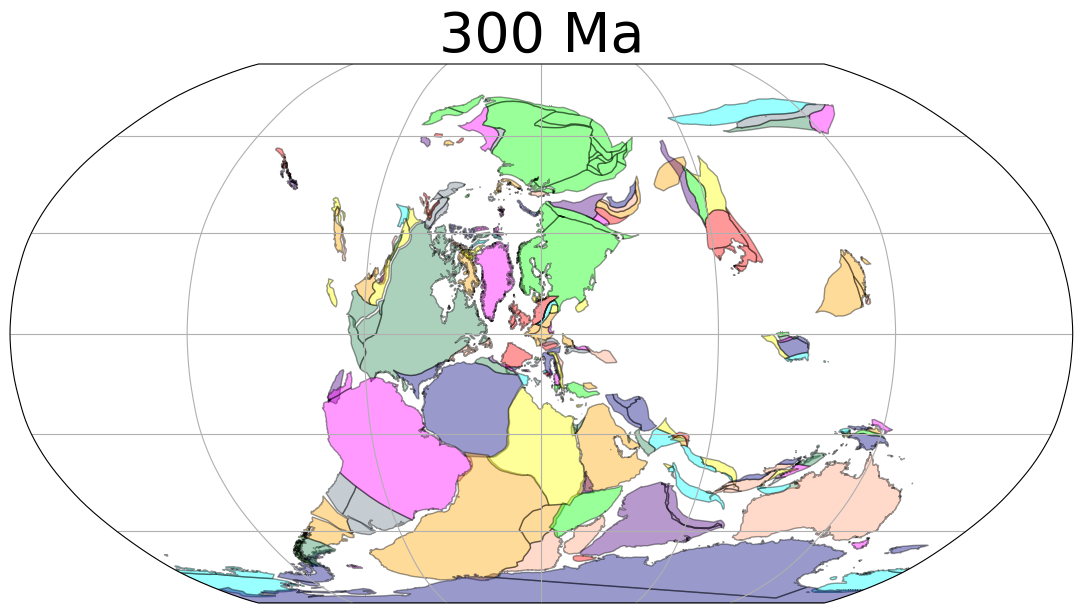

In [36]:
reconstructTime(300)

Reconstructing coastlines...
Plotting coastlines...


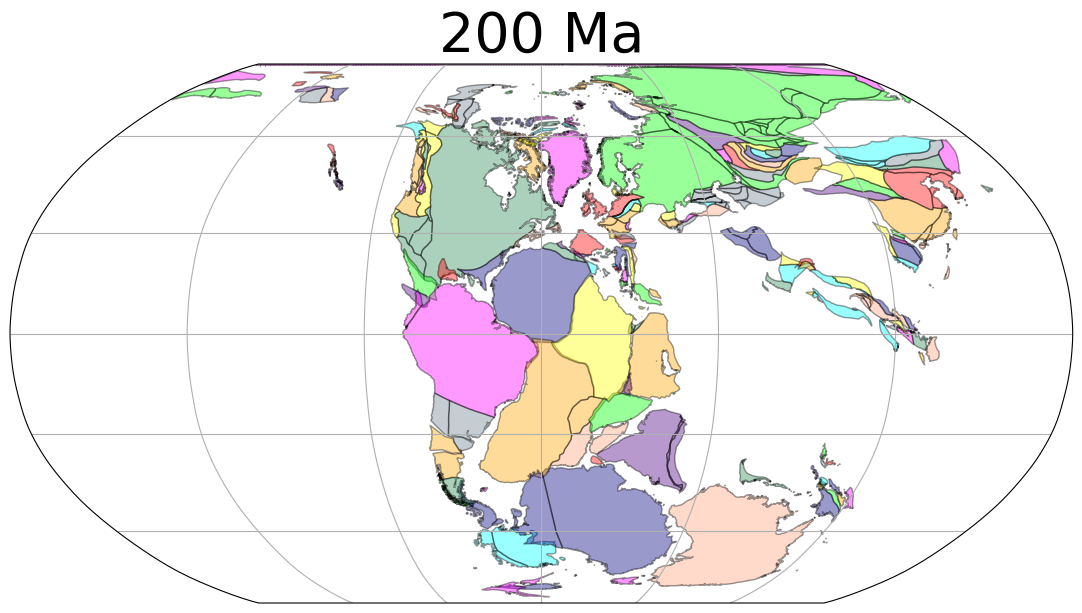

In [37]:
reconstructTime(200)

Reconstructing coastlines...
Plotting coastlines...


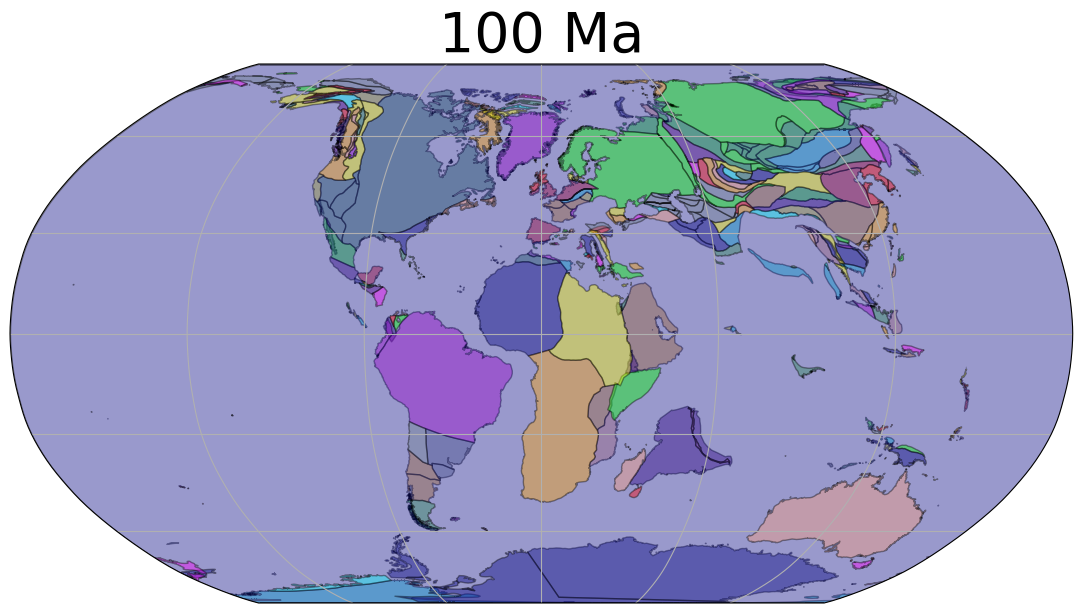

In [38]:
reconstructTime(100)

Reconstructing coastlines...
Plotting coastlines...


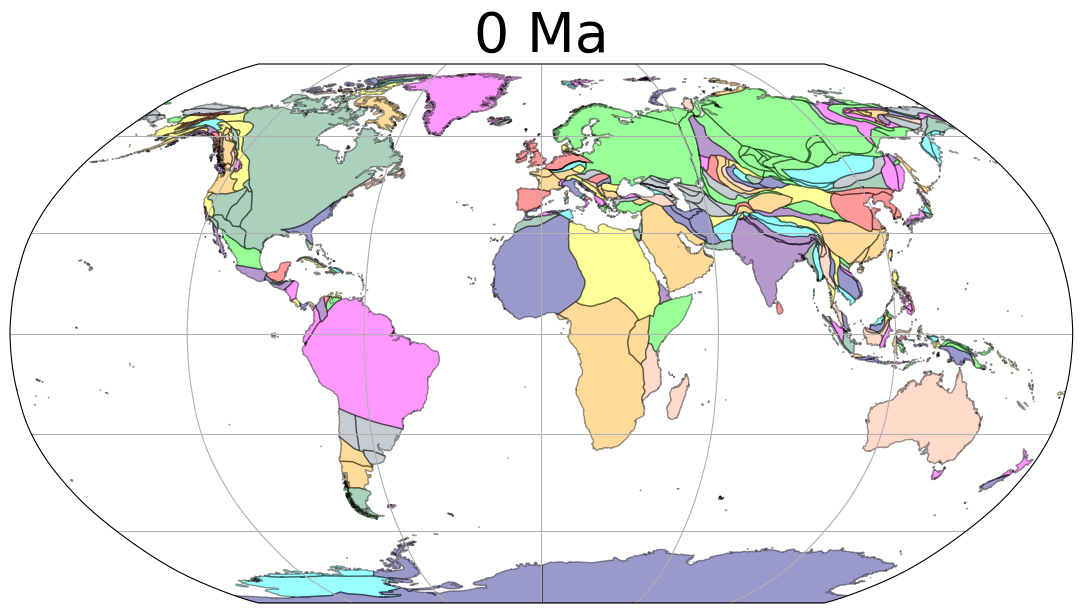

In [39]:
reconstructTime(0)